# kNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

- KNN算法实现
- EX1:约会数据
- EX2:手写数字识别

## MLiA

###  Load Data

数据读取可以用Pandas，更简洁一点

In [2]:
raw_data_df = pd.read_table("./Data/CH2/datingTestSet.txt",names=["Miles","VideoGame","Icecream","Type"])
raw_data_df.head()

,Miles,VideoGame,Icecream,Type
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


### Pairplot

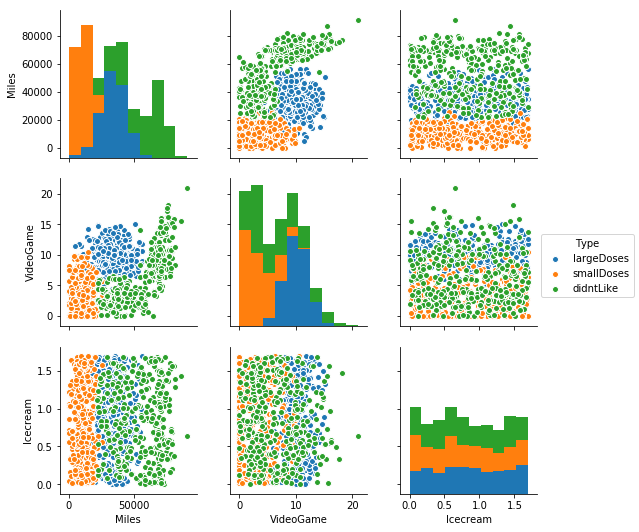

In [3]:
%matplotlib inline
sns.pairplot(raw_data_df,hue="Type")
plt.show()

### Preprocess

In [4]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Miles        1000 non-null int64
VideoGame    1000 non-null float64
Icecream     1000 non-null float64
Type         1000 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 31.3+ KB


In [5]:
raw_data_df.describe()

,Miles,VideoGame,Icecream
count,1000.000000,1000.000000,1000.000000
mean,33635.421000,6.559961,0.832073
std,21957.006833,4.243618,0.497239
min,0.000000,0.000000,0.001156
25%,13796.000000,2.933963,0.408995
50%,31669.000000,6.595204,0.809420
75%,47716.250000,10.056500,1.272847
max,91273.000000,20.919349,1.695517


In [6]:
feature_data_df = raw_data_df[["Miles","VideoGame","Icecream"]].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# feature_data_df["Type"] = raw_data_df["Type"]
feature_data_df.head()

,Miles,VideoGame,Icecream
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578


### Classfier
1. calculate the distance between inX and the current point
1. sort the distances in increasing order
1. take k items with lowest distances to inX
1. find the majority class among these items
1. return the majority class as our prediction for the class of inX

In [7]:
# k-Nearest Neighbors algorithm
def classfier(inX,features,labels,k):
    features = features.apply(lambda x:x-inX,axis = 1)
    features["distance"] = (features**2).apply(lambda x:x.sum(),axis = 1) # Euclidian distance
    features["labels"] = labels
    features.sort_values("distance",inplace=True)
    features = features.head(k)[["labels"]].apply(pd.value_counts)
    return features.index.values[0]

classfier([0.1,0.1,0.1],feature_data_df[["Miles","VideoGame","Icecream"]],raw_data_df["Type"],100)

'smallDoses'

### EX1: Dating

In [41]:
def datingClassTest(raw_data_df):
    hoRatio = 0.1
    sep_index = -1*int(raw_data_df.shape[0] * hoRatio)
    print(sep_index)
    test_data_df = raw_data_df[sep_index:]
    print(test_data_df.shape)
    train_df = raw_data_df[:sep_index]
    print(train_df.shape)
    features = ["Miles","VideoGame","Icecream"]
    label = "Type"
    error_count = 0
    for x in test_data_df.iterrows():
        result = classfier(x[1].values[:-1],train_df[features],train_df[label],3)
        print("[Predict] : ",result,"\t[Real] : ",x[1].values[-1])
        if result != x[1].values[-1]:
            error_count +=1
    print(error_count/test_data_df.shape[0])

In [42]:
datingClassTest(raw_data_df)

-100
(100, 4)
(900, 4)
[Predict] :  largeDoses 	[Real] :  didntLike
[Predict] :  smallDoses 	[Real] :  smallDoses
[Predict] :  didntLike 	[Real] :  didntLike
[Predict] :  smallDoses 	[Real] :  smallDoses
[Predict] :  smallDoses 	[Real] :  smallDoses
[Predict] :  didntLike 	[Real] :  didntLike
[Predict] :  didntLike 	[Real] :  didntLike
[Predict] :  smallDoses 	[Real] :  smallDoses
[Predict] :  didntLike 	[Real] :  largeDoses
[Predict] :  largeDoses 	[Real] :  largeDoses
[Predict] :  didntLike 	[Real] :  didntLike
[Predict] :  didntLike 	[Real] :  didntLike
[Predict] :  didntLike 	[Real] :  didntLike
[Predict] :  largeDoses 	[Real] :  didntLike
[Predict] :  didntLike 	[Real] :  largeDoses
[Predict] :  didntLike 	[Real] :  largeDoses
[Predict] :  largeDoses 	[Real] :  largeDoses
[Predict] :  largeDoses 	[Real] :  largeDoses
[Predict] :  smallDoses 	[Real] :  largeDoses
[Predict] :  largeDoses 	[Real] :  largeDoses
[Predict] :  didntLike 	[Real] :  didntLike
[Predict] :  didntLike 	[Real]

### EX2: Hand writing

In [10]:
import glob
import pandas as pd
import os.path
lst = glob.glob("./Data/CH2/digits/trainingDigits/*.txt")

features = []
labels = []
for filepath in lst:
    num = pd.read_csv(filepath,header=None).values
    fpath,fname = os.path.split(filepath)
    labels.append(int(fname.split("_")[0]))
    features.append([int(x) for x in "".join([x[0] for x in num])])


In [11]:
hw_train_df = pd.DataFrame(features)
hw_train_df["label"] = labels

In [12]:
lst = glob.glob("./Data/CH2/digits/testDigits/*.txt")
features = []
labels = []
for filepath in lst:
    num = pd.read_csv(filepath,header=None).values
    fpath,fname = os.path.split(filepath)
    labels.append(int(fname.split("_")[0]))
    features.append([int(x) for x in "".join([x[0] for x in num])])
hw_test_df = pd.DataFrame(features)
hw_test_df["label"] = labels

In [13]:
# error_count = 0
# features = [x for x in range(1024)]
# label = "label"
# for x in hw_test_df.iterrows():
#     result = classfier(x[1].values[:-1],hw_train_df[features],hw_train_df[label],3)
#     print("[Predict] : ",result,"\t[Real] : ",x[1].values[-1])
#     if result != x[1].values[-1]:
#         error_count +=1
# print(error_count)

[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Real] :  0
[Predict] :  0 	[Rea

[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Real] :  3
[Predict] :  3 	[Rea

[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Real] :  6
[Predict] :  6 	[Rea

[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  9 	[Real] :  9
[Predict] :  7 	[Rea

In [14]:
hw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Columns: 1025 entries, 0 to label
dtypes: int64(1025)
memory usage: 7.4 MB


## Sklearn

sklearn.neighbors.KNeighborsClassifier

### EX1: Dating

#### Load Data

In [135]:
dataSet = pd.read_table("./Data/CH2/datingTestSet.txt",names=["Miles","VideoGame","Icecream","Type"])

In [136]:
dataSet.head()

,Miles,VideoGame,Icecream,Type
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [137]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Miles        1000 non-null int64
VideoGame    1000 non-null float64
Icecream     1000 non-null float64
Type         1000 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 31.3+ KB


In [185]:
dataSet.groupby("Type").count()

,Miles,VideoGame,Icecream
Type,,,
didntLike,342,342,342
largeDoses,327,327,327
smallDoses,331,331,331


以上:
- 样本不是绝对均衡

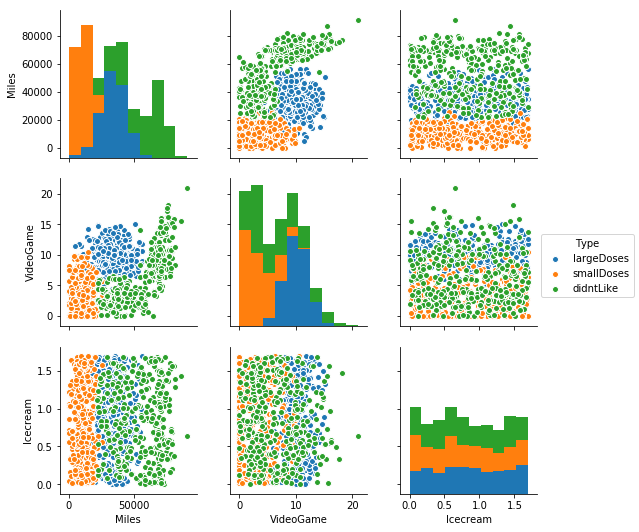

In [186]:
%matplotlib inline
sns.pairplot(dataSet,hue="Type")
plt.show()

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler

#### Preprocess

In [138]:
X = dataSet.values[:,:-1].astype(float)
X = StandardScaler().fit_transform(X)
y = dataSet.values[:,-1]

#### Test

In [182]:
def testDatebyKNN(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=124,stratify=y)
    knn = KNeighborsClassifier(algorithm="ball_tree",p=2)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("error rate : %1.2f%%" % (100*sum(y_pred != y_test)/len(y_test)))
    return y_pred, y_test

In [183]:
y_pred, y_test = testDatebyKNN(X,y)

error rate : 4.00%


结果说明
- KNN是lazy learning，所以这里面训练集和测试集拆分也没什么好拆分的。
- 算法具体实现提供三种方式:[1]
    - ball-tree O(DlogN)
    - kd-tree O(DlogN) -> O(DN) D < 20 有效 D > 20 退化
    - brute froce O(DN²)
* ball-Tree 我觉得可以认为是球坐标吧  
* Kd-Tree是从BST(Binary search tree)发展而来，是一种高维索引树形数据结构，常用于大规模高维数据密集的查找比对的使用场景中，主要是最近邻查找(Nearest Neighbor)以及近似最近邻查找(Approximate Nearest Neighbor)。在计算机视觉(CV)中主要是图像检索和识别中的高维特征向量的查找和比对。 
* 高效的暴力近邻搜索是非常有竞争力的。 然而，随着样本数N的增长，暴力方法很快变得不切实际了。


错误率|描述
-|:-|-
20%|输入数据不做处理
8%|StandardScaler,MinMaxScaler
7%|stratify=y
3%|random_state=2018,stratify=None
2%|random_steat=124,stratify=None
[1] kNN里面的两种优化的数据结构：kd-tree和ball-tree，在算法实现原理上有什么区别？ - kobe在流浪的回答 - 知乎
https://www.zhihu.com/question/30957691/answer/338362344

### EX2: Hand Writing

#### Load Data

In [203]:
# "./Data/CH2/digits/testDigits/*.txt"
def loadImage(files):
    lst = glob.glob(files)
    samples = []
    labels = []
    for filepath in lst:
        num = pd.read_csv(filepath,header=None).values
        fpath,fname = os.path.split(filepath)
        labels.append(int(fname.split("_")[0]))
        samples.append([int(x) for x in "".join([x[0] for x in num])])
    return samples, labels

In [245]:
import glob
import os.path

X,y = loadImage("./Data/CH2/digits/trainingDigits/*.txt")

In [246]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,stratify=y)

#### Tuning

In [247]:
knn = KNeighborsClassifier(algorithm="kd_tree",n_neighbors=3,p=1,n_jobs=-1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=1,
           weights='uniform')

In [248]:
y_pred = knn.predict(X_test)
print("error rate : %1.2f%%" % (100*sum(y_pred != y_test)/len(y_test)))

error rate : 1.03%


In [249]:
X_pred, y_label = loadImage("./Data/CH2/digits/testDigits/*.txt")
y_pred = knn.predict(X_pred)
print("error rate : %1.2f%%" % (100*sum(y_pred != y_label)/len(y_label)))

error rate : 1.37%


以上:
- n_neighbors调整有1个点左右的效果
- 全量数据上fit，然后做预测。

#### Predict

In [250]:
knn.fit(X,y) 
X_pred, y_label = loadImage("./Data/CH2/digits/testDigits/*.txt")
y_pred = knn.predict(X_pred)
print("error rate : %1.2f%%" % (100*sum(y_pred != y_label)/len(y_label)))

error rate : 1.27%
